<a href="https://colab.research.google.com/github/ADeogratias/newsClassification/blob/main/assignment4_DataMining.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [3]:
%cd "/content/gdrive/My Drive/datamining-classactivity/assignment4"

/content/gdrive/My Drive/datamining-classactivity/assignment4


In [4]:
!ls

mined_news.csv	     newscluster_model.sav  region.py	     terminal_colors.py
miningnewsSpyder.py  __pycache__	    sd_algorithm.py  tokenizer.pickle


In [33]:
from google.colab import files
src = list(files.upload().values())[0]

Saving sd_algorithm.py to sd_algorithm.py


In [ ]:
open('sd_algorithm.py','wb').write(src)

25289

In [7]:
from google.colab import files
src = list(files.upload().values())[0]

Saving region.py to region.py


In [10]:
from google.colab import files
src = list(files.upload().values())[0]

Saving terminal_colors.py to terminal_colors.py


In [8]:
!ls

cnn_crawler  foxnews_crawler  __pycache__  region.py  sd_algorithm.py


In [28]:
import argparse
import logging
import random
from sd_algorithm import SDAlgorithm
logging.basicConfig(level=logging.DEBUG)

In [45]:
# the file that is going to help us mine our data using the sdalgorithm

%%writefile miningnewsSpyder.py

import sd_algorithm     #sd algoithm loaded from the file above
import pandas as pd

# dataframe to convert to csv and use  
df = pd.DataFrame()

#The newspapers used for mining

#1. CBS
#2. BBC
#3. The guardian
#4. Aljazeera


# all links to mine data for all the categories
all_links = [
             'https://www.cbsnews.com/news/gottlieb-covid-infections-hot-spots-face-the-nation/',
             'https://www.cbsnews.com/news/evangelical-church-covid-19-pandemic-vaccine-skeptics/',
             'https://www.cbsnews.com/news/tax-increase-corporate-taxes-trump-biden/',
             'https://www.cbsnews.com/news/capitol-riot-arrests-2021-04-02/',
             'https://www.cbsnews.com/news/william-evans-capitol-police-office-killed-lie-honor-rotunda/',
             'https://www.cbsnews.com/news/pelosi-matt-gaetz-removed-frobm-judiciary-committee-if-allegations-true/',
             'https://www.cbsnews.com/news/pet-adoption-surge-puppy-nannies-demand/',
             'https://www.cbsnews.com/news/supreme-court-sides-google-oracle-copyright-case/',
             'https://www.cbsnews.com/news/stimulus-check-veterans-waiting-payment/',
             'https://www.cbsnews.com/news/tax-increase-corporate-taxes-trump-biden/',
             'https://www.cbsnews.com/news/facebook-hack-500-million-accounts/',
             'https://www.cbsnews.com/news/corporate-tax-global-minimum-rate-yellen/',
             'https://www.cbssports.com/college-basketball/news/scott-drew-never-let-others-change-his-story-path-or-program-and-thats-how-he-led-baylor-to-its-first-title/',
             'https://www.cbssports.com/college-basketball/news/scott-drew-never-let-others-change-his-story-path-or-program-and-thats-how-he-led-baylor-to-its-first-title/',
             'https://www.cbssports.com/golf/news/2021-masters-odds-favorites-why-you-should-root-for-these-nine-golfers-to-win-at-augusta-national/',
             'https://www.cbssports.com/wwe/news/wwe-raw-results-recap-grades-drew-mcintyre-bobby-lashley-stand-tall-ahead-of-wrestlemania-clash/live/',
             'https://www.cbssports.com/fantasy/baseball/news/fantasy-baseball-injury-reaction-fernando-tatis-likely-out-a-while-with-shoulder-subluxation-what-now/',
             'https://www.cbssports.com/college-basketball/news/2021-ncaa-tournament-bracket-college-basketball-scores-championship-game-schedule-stream-march-madness/',
             'https://www.cbsnews.com/news/dmx-hospital-vigil-family/',
             'https://www.cbsnews.com/news/music-and-the-medici/',
             'https://www.cbsnews.com/news/carrie-underwood-album-of-gospel-standards-my-savior/',
             'https://www.cbsnews.com/news/dmx-heart-attack-hospitalized/',
             'https://www.cbsnews.com/news/stanford-womens-ncaa-tournament-chamnpions-2021-arizona/',
             'https://www.cbsnews.com/news/bridgerton-star-rege-jean-page-duke-of-hastings-season-2/',
             'https://www.bbc.com/news/uk-56645208','https://www.bbc.com/news/56129210','https://www.bbc.com/news/av/uk-politics-56646912',
             'https://www.bbc.com/news/uk-politics-56647573','https://www.bbc.com/news/uk-northern-ireland-56644797','https://www.bbc.com/news/uk-wales-56611091',
             'https://www.bbc.com/news/business-56644058','https://www.bbc.com/news/technology-56639088','https://www.bbc.com/news/business-56650685',
             'https://www.bbc.com/news/business-56646761','https://www.bbc.com/news/business-52567567','https://www.bbc.com/news/business-54454990',
             'https://www.bbc.com/sport/tennis/56649098','https://www.bbc.com/sport/tennis/56618948','https://www.bbc.com/sport/rugby-union/56650185',
             'https://www.bbc.com/sport/football/56001747','https://www.bbc.com/sport/athletics/54964728','https://www.bbc.com/sport/athletics/51800436',
             'https://www.bbc.com/culture/article/20191106-why-chinese-rappers-dont-fight-the-power','https://www.bbc.com/culture/article/20200218-the-best-james-bond-themes-that-never-made-it-to-the-screen',
             'https://www.bbc.com/culture/article/20191007-the-greatest-hip-hop-songs-of-all-time','https://www.bbc.com/culture/article/20210329-remembering-miss-fury-the-worlds-first-great-superheroine',
             'https://www.bbc.com/culture/article/20210305-caterina-van-hemessen-an-unknown-visual-pioneer','https://www.bbc.com/culture/article/20210326-how-african-fashion-has-conquered-film','https://www.aljazeera.com/news/2021/4/4/profile-who-is-jordans-prince-hamza',
             'https://www.aljazeera.com/news/2021/4/6/israels-president-to-announce-candidate-to-form-new-government',
             'https://www.aljazeera.com/news/2021/4/4/republican-senator-urges-scaled-down-us-infrastructure-plan',
             'https://www.aljazeera.com/news/2021/4/2/fears-of-low-turnout-as-bulgaria-prepares-to-vote-in-pandemic',
             'https://www.aljazeera.com/news/2021/4/5/putin-signs-law-allowing-him-two-more-terms-as-russias-leader',
             'https://www.aljazeera.com/news/2021/4/6/russia-ups-security-at-navalny-prison-ahead-of-planned-protest',
             'https://www.aljazeera.com/news/2021/4/6/lebanons-baalbek-reborn-temples-a-newly-launched-virtual-tour',
             'https://www.aljazeera.com/economy/2021/4/6/jal-to-retire-fleet-of-planes-that-use-pratt-whitney-engines',
             'https://www.aljazeera.com/economy/2021/4/5/race-to-the-bottom-yellen-makes-case-for-global-minimum-tax-rate',
             'https://www.aljazeera.com/economy/2021/4/5/gamestop-plans-1bn-share-sale-after-reddit-fuelled-rally',
             'https://www.aljazeera.com/economy/2021/4/5/global-stocks-rise-spurred-by-surge-in-us-employment-data',
             'https://www.aljazeera.com/economy/2021/4/5/dow-hits-new-record-as-brightening-outlook-unleashes-bulls',
             'https://www.aljazeera.com/sports/2021/3/28/pakistan-football-federation-office-attacked',
             'https://www.aljazeera.com/news/2021/3/27/indian-cricket-legend-tendulkar-tests-positive-for-coronavirus',
             'https://www.aljazeera.com/news/2021/3/26/football-star-thierry-henry-quitting-social-media-over-racism',
             'https://www.aljazeera.com/sports/2021/4/4/football-valencia-briefly-walk-off-pitch-after-alleged-racism',
             'https://www.aljazeera.com/news/2021/3/20/ncaa-slammed-for-inequality-between-mens-and-womens-facilities',
             'https://www.aljazeera.com/sports/2021/3/31/african-tribe-long-marginalised-in-india-seeks-sporting-glory',
             'https://www.aljazeera.com/economy/2021/4/2/us-court-orders-halt-to-satan-shoe-sales-in-nike-trademark-row',
             'https://www.aljazeera.com/economy/2021/3/19/the-fed-women-entrepreneurs-and-the-kardashians-long-goodbye',
             'https://www.aljazeera.com/news/2021/3/17/disneyland-to-reopen',
             'https://www.aljazeera.com/news/2021/3/15/beyonce-taylor-swift-make-history-as-women-dominate-grammys',
             'https://www.aljazeera.com/economy/2021/3/2/new-harry-potter-video-game-will-allow-trans-characters',
             'https://www.aljazeera.com/economy/2021/2/2/gamestop-stock-fizzles-80-from-last-weeks-spectacular-highs',
             'https://www.theguardian.com/politics/2021/apr/06/keir-starmer-apologises-for-visiting-jesus-church-behind-which-performed-gay-exorcisms',
             'https://www.theguardian.com/environment/2021/apr/06/co2-from-englands-road-plan-up-to-100-times-more-than-dft-says',
             'https://www.theguardian.com/society/2021/apr/06/uk-long-covid-patients-facing-postcode-lottery-for-support',
             'https://www.theguardian.com/uk-news/2021/apr/05/conservative-mp-cheryl-gillan-dies-after-long-illness',
             'https://www.theguardian.com/politics/2021/apr/05/mayor-of-london-sadiq-khan-cannabis-legalisation-drugs-commission',
             'https://www.theguardian.com/world/2021/mar/30/who-criticises-chinas-data-sharing-as-it-releases-covid-origins-report',
             'https://www.theguardian.com/business/2021/apr/06/retail-entrepreneur-philip-day-backs-deal-to-keep-peacocks-afloat',
             'https://www.theguardian.com/travel/2021/apr/05/travel-industry-frustrated-by-lack-of-clarity-on-road-map-to-reopening',
             'https://www.theguardian.com/commentisfree/2021/mar/30/biden-tariffs-brexit-britain-eu-big-tech',
             'https://www.theguardian.com/business/2021/apr/06/uk-electric-car-sales-covid-lockdown',
             'https://www.theguardian.com/uk-news/2021/apr/05/how-a-food-bank-is-helping-city-service-workers-survive-the-pandemic',
             'https://www.theguardian.com/money/2021/mar/29/britons-pay-back-most-on-debt-in-27-years-as-credit-card-spending-slumps-covid',
             'https://www.theguardian.com/football/2021/apr/06/lille-win-psg-a-reminder-fame-ligue-1-france-title-race',
             'https://www.theguardian.com/football/2021/apr/05/wolves-west-ham-premier-league-match-report',
             'https://www.theguardian.com/football/2021/apr/05/ousmane-dembele-barcelona-real-valladolid-la-liga-el-clasico',
             'https://www.theguardian.com/football/2021/apr/05/championship-middlesbrough-watford-swansea-preston-roundup',
             'https://www.theguardian.com/football/football-league-blog/2021/apr/06/how-did-gillingham-become-the-only-efl-club-not-to-pay-agents-a-penny-football',
             'https://www.theguardian.com/sport/2021/mar/24/british-masters-golf-bid-for-crowds-at-proposed-covid-pilot-event-in-may',
             'https://www.theguardian.com/tv-and-radio/2021/apr/06/ainsley-harriott-i-talk-to-my-ingredients-when-im-cooking',
             'https://www.theguardian.com/lifeandstyle/2021/apr/05/how-we-met-i-was-terrified-my-parents-would-find-out-id-been-intimate-with-another-girl',
             'https://www.theguardian.com/film/2021/apr/06/terminator-rocky-godzilla-king-kong-versus-movie',
             'https://www.theguardian.com/media/2021/apr/06/brilliant-and-versatile-observer-and-guardian-journalist-sarah-hughes-dies-at-48',
             'https://www.theguardian.com/film/2021/apr/05/hear-me-out-why-serenity-isnt-a-bad-movie',
             'https://www.theguardian.com/food/2021/apr/06/barbecues-are-back-ten-perfect-burgers-to-try-from-vegan-bean-to-bhaji-bites'
]

# Function to get news content from url
def website_content(url):
    sd.url = url
    content = sd.analyze_page()
    return content

article_content = []          #all the links content will be saved here
category = ['politics', 'business','sports', 'entertainment']       #all the category as mined following this order
content_category = [] 

# to create a link with categories equal to the links 
track = 0
change_cat = 0

#every 6 iteration we change the category of the news we are mining
for link in all_links:
  sd = sd_algorithm.SDAlgorithm()
  content = website_content(link)
  article_content.append(content)
  content_category.append(category[change_cat])

  track += 1
  if track == 6:
    track = 0
    change_cat += 1 
    if change_cat == 4:
      change_cat = 0
    
df['content'] = article_content
df['content_category'] = content_category
df['link'] = all_links
df.to_csv("mined_news.csv")

Overwriting miningnewsSpyder.py


In [46]:
!python miningnewsSpyder.py

[*] Create DOM tree...
[*] Calculating initial groups...
[*] Merging groups...
[*] Creating regions...
[*] Calculating distances from max region...
[*] Printing regions...

[INFO:] Multiple similar regions detected!
[x]
Texts2: 
Successfully mined data
None
[*] Create DOM tree...
[*] Calculating initial groups...
[*] Merging groups...
[*] Creating regions...
[*] Calculating distances from max region...
[*] Printing regions...

[INFO:] Multiple similar regions detected!
[x]
Texts2: 
Successfully mined data
None
[*] Create DOM tree...
[*] Calculating initial groups...
[*] Merging groups...
[*] Creating regions...
[*] Calculating distances from max region...
[*] Printing regions...

[INFO:] Multiple similar regions detected!
[x]
Texts2: 
Successfully mined data
None
[*] Create DOM tree...
[*] Calculating initial groups...
[*] Merging groups...
[*] Creating regions...
[*] Calculating distances from max region...
[*] Printing regions...

[INFO:] Multiple similar regions detected!
[x]
Texts2

In [3]:
# If we check the drive now, we find our mined csv file present ready to be used
!ls

mined_news.csv	     __pycache__  sd_algorithm.py     tokenizer.pickle
miningnewsSpyder.py  region.py	  terminal_colors.py


In [5]:
import pandas as pd

In [6]:
df = pd.read_csv("mined_news.csv")
df.head()

,Unnamed: 0,content,content_category,link
0,0,"('multiple', None, None, ['\nWashington — Form...",politics,https://www.cbsnews.com/news/gottlieb-covid-in...
1,1,"('multiple', None, None, ['\nVaccine hesitancy...",politics,https://www.cbsnews.com/news/evangelical-churc...
2,2,"('multiple', None, None, ['\nWhite House econo...",politics,https://www.cbsnews.com/news/tax-increase-corp...
3,3,"('multiple', None, None, ['\nEvidence shows ex...",politics,https://www.cbsnews.com/news/capitol-riot-arre...
4,4,"('multiple', None, None, ['\nCapitol Police fo...",politics,https://www.cbsnews.com/news/william-evans-cap...


In [7]:
pd.set_option('display.max_colwidth', 100)
df["content"]

0     ('multiple', None, None, ['\nWashington — Former Food and Drug Administration Commissioner Dr. S...
1     ('multiple', None, None, ['\nVaccine hesitancy in the evangelical communit...It\'s a case that w...
2     ('multiple', None, None, ['\nWhite House economic adviser says infrastruct...More than two dozen...
3     ('multiple', None, None, ['\nEvidence shows extremists coordinated Capitol...broke into the U.S....
4     ('multiple', None, None, ['\nCapitol Police force reeling after fatal car ...Washington — U.S. C...
                                                     ...                                                 
91    ('multiple', None, None, ['\nucy Campbell was 11 years old when her parents sent her to an indep...
92    ('multiple', None, None, ['\nWell, now that Godzilla vs Kong is out, it looks like we’re back on...
93    ('multiple', None, None, ['\nTributes have been paid to Sarah Hughes, the Observer and Guardian ...
94    ('multiple', None, None, ['\nt happens a

## Let's clean the data

In [8]:
# let's clean the data
df["content"][95][29:-5]

'ven if the sun is only coming out now and again, the lifting of restrictions means many of us will be thinking itâ\\x80\\x99s barbecue time. And while it may be easy to get overexcited and just sling a bunch of supermarket burgers on the grill, a special occasion like this calls for a bit of an effort. Here are 10 recipes for homemade burgers. My suggestion is that you try them all. Felicity Cloakeâ\\x80\\x99s perfect hamburger.A quick warning before we start: this list features the â\\x80\\x9cdouble Cloakeâ\\x80\\x9d. If youâ\\x80\\x99re new to making any type of food, the place to start is always Felicity Cloakeâ\\x80\\x99s â\\x80\\x9cperfectâ\\x80\\x9d series. Her hamburger recipe is all the proof you should need. She has done the work here, so even the slightly more outre additions (ie Guinness) make perfect sense. \\nCloake part two is her recipe for vegan bean burgers. Like all vegan burgers, this requires a lot more ingredients than a meat-based burger â\\x80\\x93 potato, broad

In [9]:
# Removing irrelevant texts at the end and beginning of the article
for i in range(len(df['content'])):
  df['content'][i] = df['content'][i][29:-5]
df['content'][95]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


'ven if the sun is only coming out now and again, the lifting of restrictions means many of us will be thinking itâ\\x80\\x99s barbecue time. And while it may be easy to get overexcited and just sling a bunch of supermarket burgers on the grill, a special occasion like this calls for a bit of an effort. Here are 10 recipes for homemade burgers. My suggestion is that you try them all. Felicity Cloakeâ\\x80\\x99s perfect hamburger.A quick warning before we start: this list features the â\\x80\\x9cdouble Cloakeâ\\x80\\x9d. If youâ\\x80\\x99re new to making any type of food, the place to start is always Felicity Cloakeâ\\x80\\x99s â\\x80\\x9cperfectâ\\x80\\x9d series. Her hamburger recipe is all the proof you should need. She has done the work here, so even the slightly more outre additions (ie Guinness) make perfect sense. \\nCloake part two is her recipe for vegan bean burgers. Like all vegan burgers, this requires a lot more ingredients than a meat-based burger â\\x80\\x93 potato, broad

In [10]:
# Cleaning texts input from articles and removing special characters
import re
import string
from html.parser import HTMLParser
from nltk.corpus import stopwords
import nltk

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        96 non-null     int64 
 1   content           96 non-null     object
 2   content_category  96 non-null     object
 3   link              96 non-null     object
dtypes: int64(1), object(3)
memory usage: 3.1+ KB


In [12]:
nltk.download('stopwords')
stopwords_eng = stopwords.words('english') 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [13]:
# Function to clean texts
def clean_content(content):
  # Removing html characters
  content = HTMLParser().unescape(content)
  content = content.lower()
  
  # clean by removing urls and hashtags
  content = re.sub(r'https?:\/\/.\S+', "", content)
  content = re.sub(r'#', '', content)
  content = re.sub(r'^RT[\s]+', '', content)

  content_tokens = content.split()
  content_list=[]
  for word in content_tokens:
    if word not in stopwords_eng:
      content_list.append(word)

  # Remove punctuations
  clean_content = []
  for word in content_list:
    if word not in string.punctuation:
      clean_content.append(word)

  return clean_content

In [14]:
def list_to_String(content): 
    strings = " "   
    return (strings.join(content))

In [15]:
# Clean content
for i in range(len(df['content'])):
  clean_cont = clean_content(df['content'][i])
  clean_cont = list_to_String(clean_cont)
  df['content'][i] = clean_cont
df['content'][0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: The unescape method is deprecated and will be removed in 3.5, use html.unescape() instead.
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


'washington — former food drug administration commissioner dr. scott gottlieb sunday said rise coronavirus infections among young people driving new outbreaks states, believe "true" fourth wave pandemic.\\n"what we\\\'re seeing pockets infection around country, particularly younger people haven\\\'t vaccinated also school-aged children," gottlieb said interview "face nation," noting rise cases among school-aged kids michigan, minnesota massachusetts.\\xa0\\n"you\\\'re seeing outbreaks schools infections social cohorts haven\\\'t exposed virus before, maybe better job sheltering, they\\\'re getting exposed virus they\\\'re getting infected," continued. "the infection changing contours terms who\\\'s stricken right now."\\ntranscript: dr. scott gottlieb "face nation"with coronavirus cases rising 27 states district columbia, public health officials urging americans remain vigilant following mitigation measures. rate vaccinations continues accelerate — 4 million doses administered friday a

In [16]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.preprocessing.text import Tokenizer

In [17]:
df1 = df[['content','content_category']]
le = LabelEncoder()
df1['content_category'] = le.fit_transform(df1['content_category'])
df1['content_category']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


0     2
1     2
2     2
3     2
4     2
     ..
91    1
92    1
93    1
94    1
95    1
Name: content_category, Length: 96, dtype: int64

In [18]:
le.inverse_transform([0, 1, 2, 3])

array(['business', 'entertainment', 'politics', 'sports'], dtype=object)

In [19]:
import numpy as np

In [20]:
# Shuffle records
df1 = df1.reindex(np.random.permutation(df1.index))
df1

,content,content_category
87,neil warnock tipped watford join norwich premier league next season watching middlesbrough side ...,3
73,carbon emissions england’s planned £27bn roadbuilding programme 100 times greater government sta...,2
38,watch live bbc iplayer; follow live text commentary bbc sport website app.england centre emily s...,3
42,"2015, chinese hip-hop group higher brothers learned something hard way: careful songs turn polit...",1
46,"think ""creative genius"" parade self-portraits history art, brooding intensely unfinished canvas,...",1
...,...,...
0,washington — former food drug administration commissioner dr. scott gottlieb sunday said rise co...,2
94,"happens year. film released, often featuring major stars shockingly large budget, mind-numbingly...",1
61,tendulkar tests positive infections continued surge world’s second populous country.\nindian cri...,3
13,"baylor gone team introductions. time top-seeded, top-ranked, 31-0 zags introduced. teammates mov...",3


In [21]:
# Splitting features from the label
text_content = df1['content'].values
target = df1['content_category'].values

In [22]:
tokenizer = Tokenizer(num_words=100)
tokenizer.fit_on_texts(text_content)

In [23]:
#tokenizer.word_index

In [24]:
# Integer encoding the documents
encoded_data = tokenizer.texts_to_sequences(text_content)
print(encoded_data[0:4])

[[90, 6, 91, 35, 74, 27, 40, 52, 90, 59, 22, 15, 4, 1, 79, 45, 99, 4, 51, 42, 4, 1, 24, 35, 4, 11, 29, 74, 55, 42, 42, 61, 65, 66, 42, 62, 42, 74, 51, 42, 27, 33, 3, 74, 51, 42, 74, 74, 22, 24, 4, 1, 38, 33, 38, 67, 12, 4, 42, 90, 92, 51, 19, 51, 42, 42, 19, 74, 22, 29, 35, 22, 51, 62, 42, 75, 22, 91, 42, 29, 35, 7, 11, 33, 22, 11], [32, 88, 62, 56, 32, 22, 12, 32, 12, 1, 7, 45, 28, 7, 6, 43, 42, 4, 22, 12, 1, 1, 1, 32, 31, 12, 7, 52, 4, 32, 10, 93, 61, 61, 1, 4, 1, 45, 11, 83, 19, 4, 1, 10, 53, 32, 32, 13, 24, 32, 4, 6, 83, 84, 8], [37, 8, 2, 2, 30, 2, 47, 72, 22, 41, 80, 10, 47, 2, 28, 36, 13, 38, 38, 47, 2, 35, 22, 2, 2, 2, 20, 2, 35, 46, 2, 35, 44, 7, 7, 13, 19, 99, 24, 22, 19, 75, 15, 1, 1, 36, 13, 5], [81, 65, 6, 4, 19, 19, 4, 74, 27, 45, 12, 74, 45, 17, 5, 11, 84, 4, 33, 75, 81, 76, 12, 12, 17, 5, 13, 12, 13, 12, 12, 35, 11, 13, 45, 10, 17, 5, 92, 31, 11, 12, 31, 12, 84, 6, 84, 3, 17, 5, 16, 81, 12, 11, 11, 77, 12, 12, 11, 17, 5, 12, 22, 13, 53, 47, 34, 28, 12, 3]]


In [42]:
# Saving tokenizer file
import pickle

filename = "tokenizer.pickle"
pickle.dump(tokenizer, open(filename, 'wb'))

In [25]:
#our tokenized file is saved
!ls

mined_news.csv	     newscluster_model.sav  region.py	     terminal_colors.py
miningnewsSpyder.py  __pycache__	    sd_algorithm.py  tokenizer.pickle


In [26]:
# pad documents
max_length = 15
padded_data = pad_sequences(encoded_data, maxlen=max_length, padding='post')

In [27]:
# Lets reduce dimensionality with Principal component analysis (PCA) model
from sklearn.decomposition import PCA
model = PCA(2)
X_reduce = model.fit_transform(padded_data)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


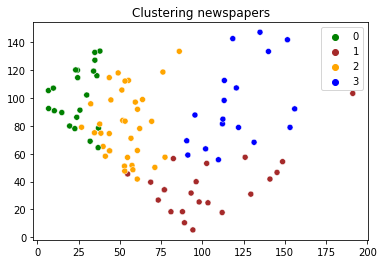

In [28]:
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score
import pickle
import matplotlib.pyplot as plt
import seaborn as sns

kmeans = KMeans(n_clusters=4, random_state=0)
X_ = kmeans.fit_transform(X_reduce)
label = kmeans.predict(X_reduce)

# Evaluating the accuracy of the model
score = accuracy_score(label, target)
plt.title("Clustering newspapers")
sns.scatterplot(X_[:, 0], X_[:, 1], hue=label, palette=['green','brown','orange','blue'],legend='full')

In [29]:
# print the accuracy of the model
print("k-means Model Accuracy: %.2f%%" % (score*100))

k-means Model Accuracy: 33.33%


In [32]:
# Lets save the model
import pickle
filename = "newscluster_model.sav"
pickle.dump(kmeans, open(filename, 'wb'))

In [33]:
# Lets Load the model to test it
pickle_in = open("newscluster_model.sav", "rb")
model = pickle.load(pickle_in)

In [34]:
content = df['content'][2]
content = clean_content(content)
encoded_text = tokenizer.texts_to_sequences([content])
max_length = 2
padded_text = pad_sequences(encoded_text, maxlen=max_length, padding='post')
y_pred = model.predict(padded_text)
print(y_pred)

[3]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DeprecationWarning: The unescape method is deprecated and will be removed in 3.5, use html.unescape() instead.
  after removing the cwd from sys.path.


We were able to predict the label where the article belongs and that is what we want.

Lets create a web link to use our model online.

In [35]:
!wget https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip

--2021-04-08 05:24:43--  https://bin.equinox.io/c/4VmDzA7iaHb/ngrok-stable-linux-amd64.zip
Resolving bin.equinox.io (bin.equinox.io)... 3.217.26.81, 3.211.152.205, 34.192.46.56, ...
Connecting to bin.equinox.io (bin.equinox.io)|3.217.26.81|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14746350 (14M) [application/octet-stream]
Saving to: ‘ngrok-stable-linux-amd64.zip’

ngrok-stable-linux- 100%[===================>]  14.06M  6.05MB/s    in 2.3s    

2021-04-08 05:24:46 (6.05 MB/s) - ‘ngrok-stable-linux-amd64.zip’ saved [14746350/14746350]



Installing NGrok to host the model

In [37]:
!unzip ngrok-stable-linux-amd64.zip

Archive:  ngrok-stable-linux-amd64.zip
replace ngrok? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: ngrok                   


In [38]:
!pip install -q pyngrok
!pip install -q streamlit
!pip install -q streamlit_ace

In [39]:
get_ipython().system_raw('./ngrok http 8501 &')

In [41]:
!curl -s http://localhost:4040/api/tunnels | python3 -c \
    'import sys, json; print("Execute the next cell and the go to the following URL: " +json.load(sys.stdin)["tunnels"][0]["public_url"])'

Execute the next cell and the go to the following URL: https://bc783d30cd1e.ngrok.io


In [ ]:
%%writefile app.py

import streamlit as st
import pandas as pd
import re
import string
from html.parser import HTMLParser
from nltk.corpus import stopwords
from tensorflow.keras.preprocessing.sequence import pad_sequences
import pickle
import nltk
import sd_algorithm

df = pd.read_csv("mined_news.csv")

sd = sd_algorithm.SDAlgorithm()

# Loading the model
pickle_in = open("newscluster_model.sav", "rb")
model = pickle.load(pickle_in)

# Loading the tokenizer
pickle_n = open("tokenizer.pickle", "rb")
tokenizer = pickle.load(pickle_n)

# Get news content from url
def website_content(url):
    sd.url = url
    content = sd.analyze_page()
    return content

def list_to_String(content): 
    strings = " "   
    return (strings.join(content))

# Function to clean texts
def clean_content(content):
  # Removing html characters
  content = HTMLParser().unescape(content)
  content = content.lower()
  
  # clean by removing urls and hashtags
  content = re.sub(r'https?:\/\/.\S+', "", content)
  content = re.sub(r'#', '', content)
  content = re.sub(r'^RT[\s]+', '', content)

  content_tokens = content.split()
  content_list=[]
  for word in content_tokens:
    if word not in stopwords_eng:
      content_list.append(word)

  # Remove punctuations
  clean_content = []
  for word in content_list:
    if word not in string.punctuation:
      clean_content.append(word)

  return clean_content

def predict_news(url):
    content = website_content(url)
    content = clean_content(listToString(content[3]))
    encoded_text = tokenizer.texts_to_sequences([content])
    max_length = 2
    padded_text = pad_sequences(encoded_text, maxlen=max_length, padding='post')
    y_pred = model.predict(padded_text)
    return y_pred


st.title("Model For News Category")
html_temp = """
<div style="background-color:black;padding:10px">
<h3 style="color:white;">Insert the link to the article, and I'll do the rest of the magic..</h3>
</div>
"""
st.markdown(html_temp, unsafe_allow_html=True)

result = ""
categori = ""
related = []
url = st.text_input("Fill in the field below", "")

if st.button("Classify News"):
    result = predict_news(url)
    if result == [0]:
        categori = 'Business'
        related = df[df['category']=='business']["url"]
    elif result == [1]:
        categori = 'Entertainment'
        related = df[df['category']=='entertainment']["url"]
    elif result == [2]:
        categori = 'Politics'
        related = df[df['category']=='politics']["url"]
    elif result == [3]:
        categori = 'Sports'
        related = df[df['category']=='sports']["url"]
st.success('The article category prediction is: {}'.format(categori))

# front end elements of the web page 
html_temp = """ 
<div style ="background-color:black;padding:10px"> 
<h1 style ="color:white;">Articles that are related</h1> 
</div> 
""" 
st.markdown(html_temp, unsafe_allow_html=True)
st.write(related)

In [42]:
!streamlit run app.py &>/dev/null&

NameError: ignored

In [ ]:
from pyngrok import ngrok
 
public_url = ngrok.connect('8501')
public_url